# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset


'/content/drive/MyDrive/github/eda_examples/Kaggle_Adult_income_dataset'

# Income predictor

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
# ['adult.csv']

['adult.csv']


Подключите необходимые библиотеки.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
sns.set(rc = {'figure.figsize':(10, 8)})

Загрузите данные. Они находятся в директории input.

In [5]:
df = pd.read_csv("./adult.csv")

In [6]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


Визуализируйте распределение значений возраста для лиц, зарабатывающих > 50K и < 50K. Найдите среднее и стандартное отклонение возраста в каждой из групп.

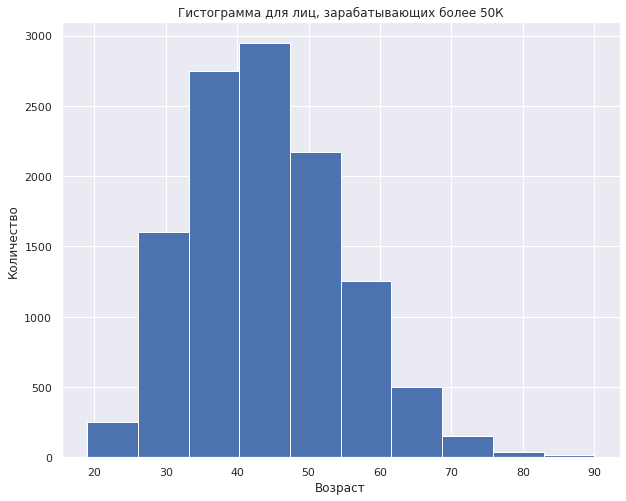

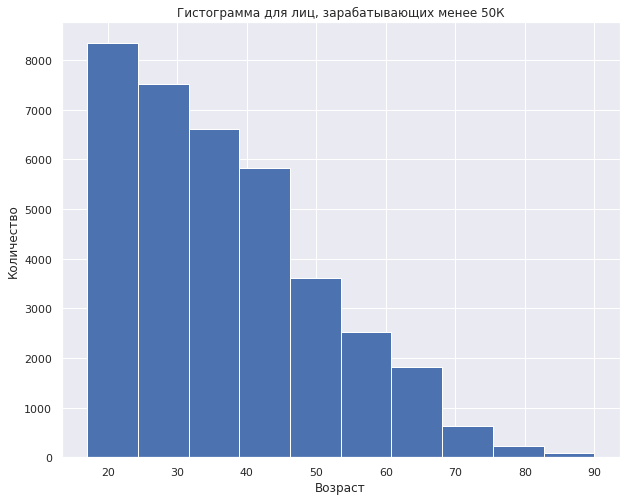

Среднее отклонение возраста для лиц, зарабатывающих более 50К:
44.275177547702576
Среднее отклонение возраста для лиц, зарабатывающих менее 50К:
36.87218409366169
Стандартное отклонение возраста для лиц, зарабатывающих более 50К:
10.558983370287825
Стандартное отклонение возраста для лиц, зарабатывающих менее 50К:
14.104118026101577


In [7]:
df[df["income"] ==">50K"]["age"].hist() # гистограмма для визуализации распределения значений возраста для зарабатывающих более 50К
plt.title('Гистограмма для лиц, зарабатывающих более 50К')#название гистограммы
plt.xlabel("Возраст") # подписываем ось Ox
plt.ylabel("Количество") # подписываем ось Oy
plt.show() # построение гистограммы
df[df["income"] =="<=50K"]["age"].hist() # гистограмма для визуализации распределения значений возраста для зарабатывающих менее 50К
plt.title('Гистограмма для лиц, зарабатывающих менее 50К') # название гистограммы
plt.xlabel("Возраст") # подписываем ось Ox
plt.ylabel("Количество") # подписываем ось Oy
plt.show() # построение гистограммы
print("Среднее отклонение возраста для лиц, зарабатывающих более 50К:")
print(df[df["income"] ==">50K"]["age"].mean()) # выводим среднее отклонение возраста для лиц зарабатывающих более 50К
print("Среднее отклонение возраста для лиц, зарабатывающих менее 50К:")
print(df[df["income"] =="<=50K"]["age"].mean()) # выводим среднее отклонение возраста для лиц зарабатывающих менее 50К
print("Стандартное отклонение возраста для лиц, зарабатывающих более 50К:")
print(df[df["income"] ==">50K"]["age"].std()) # выводим среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих более 50К
print("Стандартное отклонение возраста для лиц, зарабатывающих менее 50К:")
print(df[df["income"] =="<=50K"]["age"].std()) # выводим среднеквадратичное (стандартное) отклонение возраста для лиц зарабатывающих менее 50К

Верно ли, что люди, зарабатывающие > 50K имеют как минимум полное среднее образование (значения **education** --- Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)? 

В этом задании считаем, что обучение в колледже не свидетельствует о полном среднем образовании.

In [8]:
df1 = df[df['income'] == ">50K"].shape[0] # кол-во людей, зарабатывающих более 50К
df2 = df[(df['income'] == ">50K") & ((df['education'] == 'Bachelors')|(df['education'] == 'HS-grad')|(df['education'] == 'Prof-school')|(df['education'] == 'Assoc-acdm')|(df['education'] == 'Assoc-voc')|(df['education'] == 'Masters')|(df['education'] == 'Doctorate'))].shape[0] # кол-во людей, зарабатывающих более 50К, имеющих как минимум полное среднее образование
df3 = df1 - df2 # кол-во людей, зарабатывающих более 50К, не имеющих полного среднего образования
if df1 == df2 : # если все люди, зарабатывающие более 50К, имеют как минимум полное среднее образование
    print("Да, действительно, все люди, зарабатывающие более 50K, имеют как минимум полное среднее образование")
else: # в ином случае
    print("Нет, не все люди, зарабатывающие более 50K, имеют полное среднее образование.")
    print("Количество людей, зарабатывающих более 50K -", df1, "человек.")
    print("Из них ", df3, "без полного среднего образования.")
        

Нет, не все люди, зарабатывающие более 50K, имеют полное среднее образование.
Количество людей, зарабатывающих более 50K - 11687 человек.
Из них  2429 без полного среднего образования.


Как видим, заработок выше 50К не свидетельствует о наличии полного среднего образования. Однако, стоит отметить, что среди лиц, зарабатывающих более 50К, количество людей с полным средним образованием значительно превышает количество людей без него.

Какие мужчины зарабаывают в среднем больше --- женатые или холостые?

In [9]:
df4 = df[(df["relationship"] == "Husband")]["income"].value_counts(normalize = True) # значения относительно частоты встречаемых значений ">50K" и "<=50K" среди женатых мужчин
df5 = df[(df["relationship"] == "Unmarried") & (df["gender"] == "Male")]["income"].value_counts(normalize = True) # значения относительно частоты встречаемых значений ">50K" и "<=50K" среди холостых мужчин
print("Процент мужчин, зарабатывающих более 50К, среди женатых -", df4[">50K"]*100, "%;") # вывод частоты встречаемого значения ">50K" в процентах среди женатых мужчин
print("Процент мужчин, зарабатывающих более 50К, среди холостых -", df5[">50K"]*100, "%;") # вывод частоты встречаемого значения ">50K" в процентах среди холостых мужчин
print("Вывод:")
if(df4[">50K"] > df5[">50K"]) : # если частота встречаемого значения ">50K" выше у женатых мужчин
    print("Женатые мужчины в среднем зарабатывают больше.")
elif(df4[">50K"] == df5[">50K"]) : # если частота встречаемого значения ">50K" у женатых и холостых мужчин одинаковая
    print("Женатые и холостые мужчины в среднем зарабатывают одинаково.")
else: # в ином случае, т.е. если частота встречаемого значения ">50K" выше у холостых мужчин
    print("Холостые мужчины в среднем зарабатывают больше.")

Процент мужчин, зарабатывающих более 50К, среди женатых - 44.86711300466626 %;
Процент мужчин, зарабатывающих более 50К, среди холостых - 12.280701754385964 %;
Вывод:
Женатые мужчины в среднем зарабатывают больше.


Как видим, частота встречаемого значения ">50K" у женатых мужчин выше, чем у холостых. Из этого можем сделать вывод, что женатые мужчины в среднем зарабатывают больше.

Каково максимальное количество рабочих часов в неделю? Сколько людей работают такое количество времени и каков среди них процент тех, кто зарабатывает много?

In [10]:
df6 = df["hours-per-week"].max() # максимально кол-во рабочих часов в неделю
df7 = df[df["hours-per-week"] == df6].shape[0] # кол-во людей, работающих максимальное кол-во часов в неделю
df8 = df[df["hours-per-week"] == df6]["income"].value_counts(normalize = True) # значения относительно частоты встречаемых значений ">50K" и "<=50K" среди людей, работающих максимальное кол-во часов в неделю
print("Максимальное количество рабочих часов в неделю -", df6, "часов;") # вывод максимального кол-ва рабочих часов в неделю
print(df7, "человек работают", df6, "часов в неделю;") # вывод кол-ва людей, работающих максимальное кол-во часов в неделю
print("Процент людей, зарабатывающих много, среди тех, кто работает", df6, "часов в неделю:")
print(df8[">50K"]*100, "%.") # вывод процента людей, зарабатывающих более 50К, среди тех, кто работает максимальное кол-во часов в неделю

Максимальное количество рабочих часов в неделю - 99 часов;
137 человек работают 99 часов в неделю;
Процент людей, зарабатывающих много, среди тех, кто работает 99 часов в неделю:
29.927007299270077 %.


Можем сделать вывод о том, что не всегда высокий заработок зависит от количества рабочих часов в неделю.

## 'income+' <-> 'hours-per-week' коэф.корреляции Пирсона

Что можно сказать о корреляции между количеством рабочих часов и зарплатой? Является ли она статистически значимой?

In [11]:
df['income+'] = (df['income'] == '>50K') # добавляем признак относительно доходов >50K и <=50K
r = pearsonr(df['income+'], df['hours-per-week']) # вычисляем коэффициент корреляции между количеством рабочих часов и зарплатой, проверяем их на статистическую значимость
print('Pearson correlation:', r[0], ', p-value:', r[1], ";") # выводим результаты вычислений
if(r[1] < 0.05) : # если p-value меньше порогового значения 0.05
    print("Корреляция между количеством рабочих часов и зарплатой статистически значима, поскольку p-value < 0.05.")
else : # в ином случае
    print("Корреляция между количеством рабочих часов и зарплатой статистически не является значимой, поскольку p-value >= 0.05.") 

Pearson correlation: 0.22768676056081386 , p-value: 0.0 ;
Корреляция между количеством рабочих часов и зарплатой статистически значима, поскольку p-value < 0.05.


Поскольку p-value меньше порогового значения 0.05, делаем вывод о том, что корреляция является статистически значимой. Проверим p-value через другие функции.

## 'income+' <-> 'hours-per-week' коэф.корреляции Спирмена/Kendalltau

In [ ]:
r = spearmanr(df['income+'], df['hours-per-week'])
print('Spearman correlation:', r[0], ', p-value:', r[1], ";")
r = kendalltau(df['income+'], df['hours-per-week'])
print('Kendalltau correlation:', r[0], ', p-value:', r[1], ".")

Spearman correlation: 0.2681657658301571 , p-value: 0.0 ;
Kendalltau correlation: 0.23742944661375098 , p-value: 0.0 .


Значение p подтвердилось, корреляция статистически значима. 

## `education` <-> `hours-per-week` отношение

Как связан уровень образования и количество рабочих часов? Не забывайте о визуализации информации.

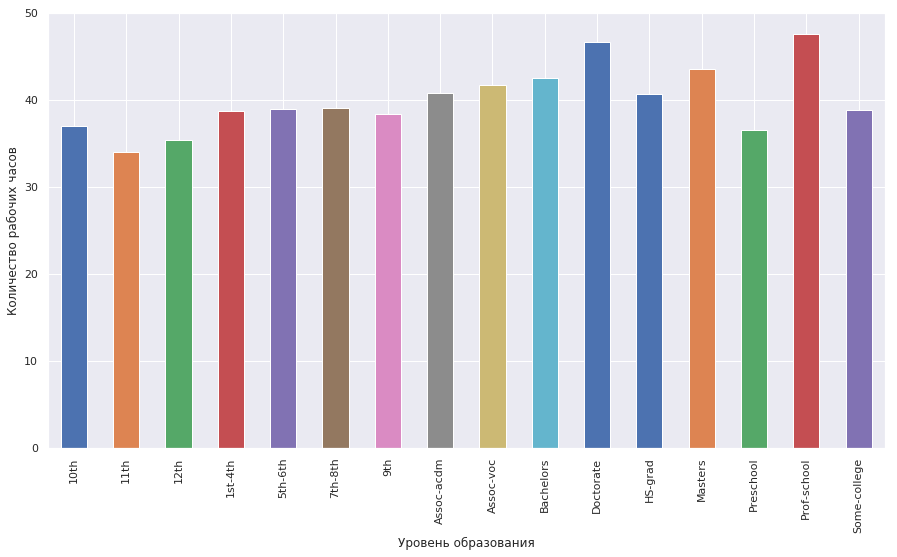

In [ ]:
plt.figure(figsize = (15, 8)) # увеличиваем размер картинки 
df.groupby("education")["hours-per-week"].mean().plot(kind = "bar") # группируем данные по уровню образования, вычисляем среднее количество рабочих часов в каждой группе
plt.xlabel('Уровень образования') # подписываем ось Ox
plt.ylabel('Количество рабочих часов') # подписываем ось Oy 
plt.show()#строим

## `native-country `<-> `income` отношение

Визуализируйте распределение заработков (группы > 50K и < 50K) по странам. Какой вывод можно сделать?

Text(0,0.5,'Страна')

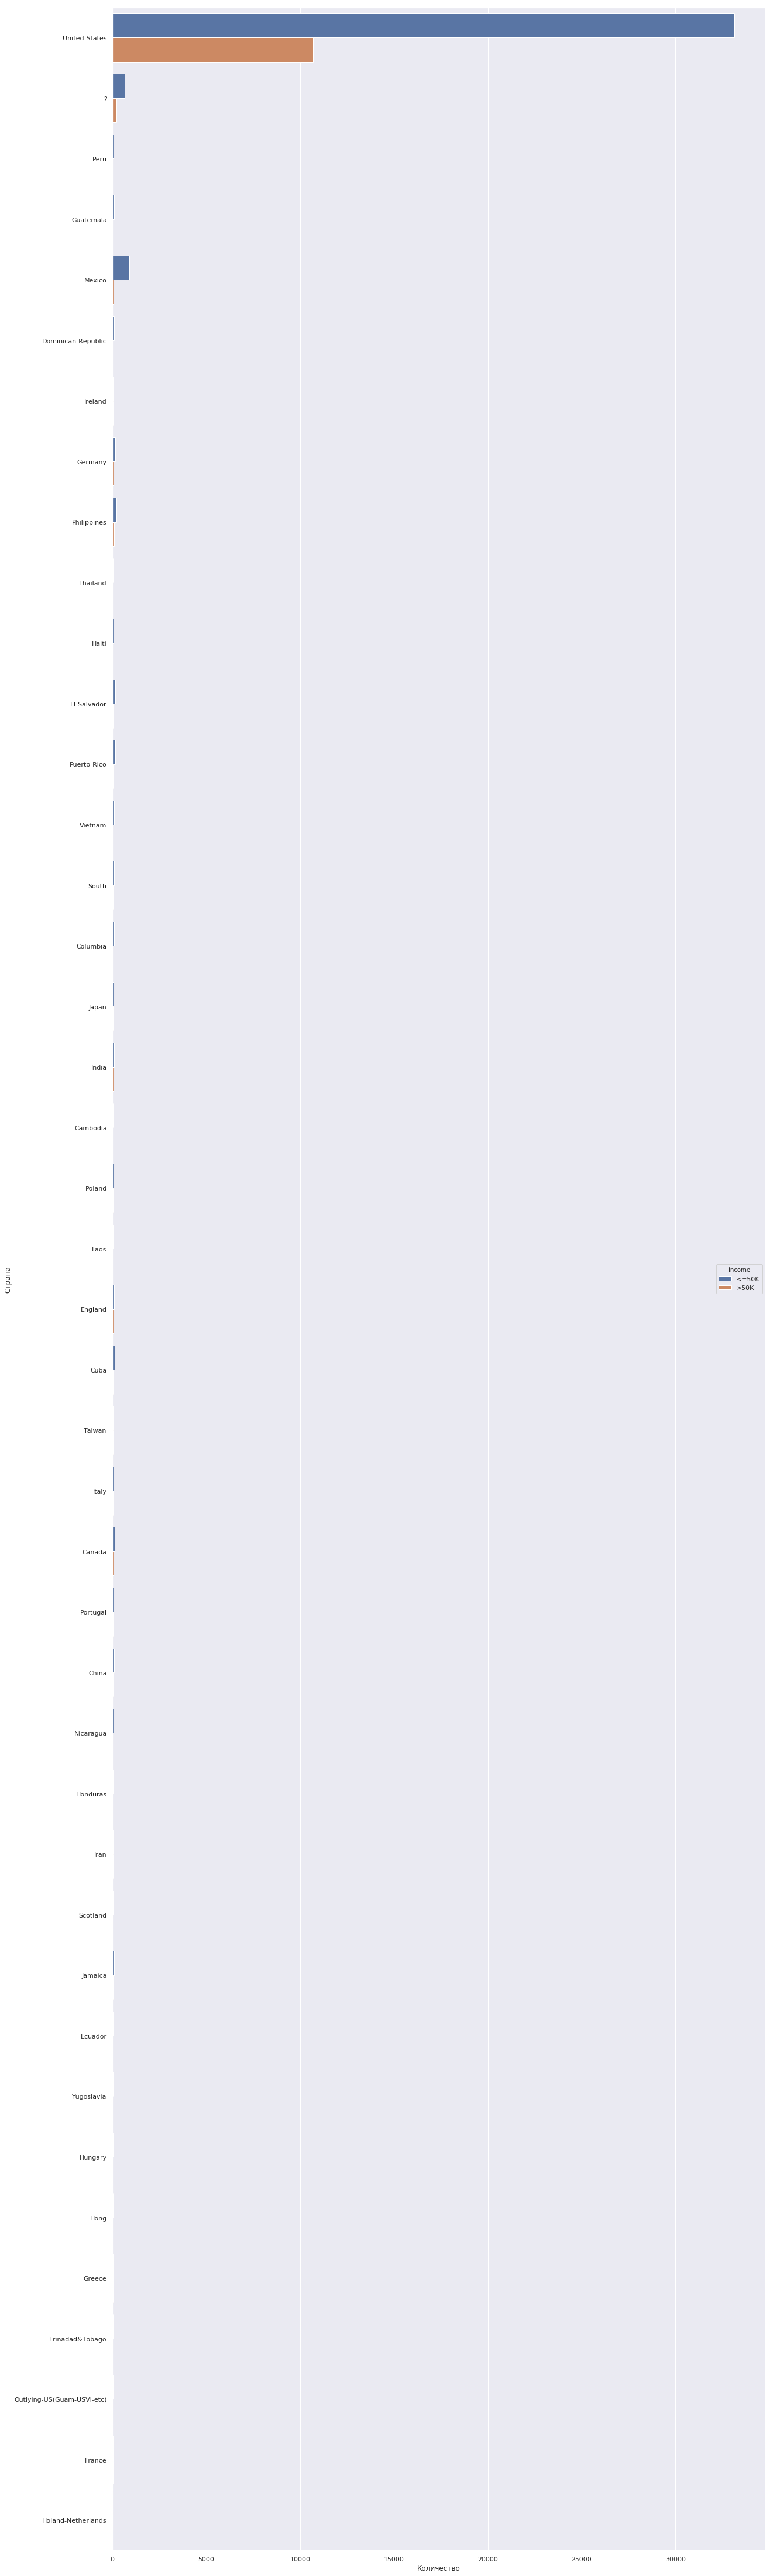

In [ ]:
plt.figure(figsize = (20, 80)) # корректируем размер изображения
sns.countplot(y = 'native-country', hue = 'income', data = df) # визуализируем распределение заработков по странам
plt.xlabel('Количество') # подписываем ось Ox
plt.ylabel('Страна') # подписываем ось Oy

Во всех странах количество людей с доходом менее 50К значительно превышает количество людей с доходом менее 50К. Больше всего в наших данных информации о людях из США. В основном в более развитых странах процент людей, зарабатывающих много, выше. Интересно, что в Индии разница в количестве между зарабатывающими более 50К и зарабатывающими менее 50К не так велика, как в других странах.

Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.

## 'race' <-> 'income' отношение

Визуализируем распределение дохода по расам.

Text(0,0.5,'Раса')

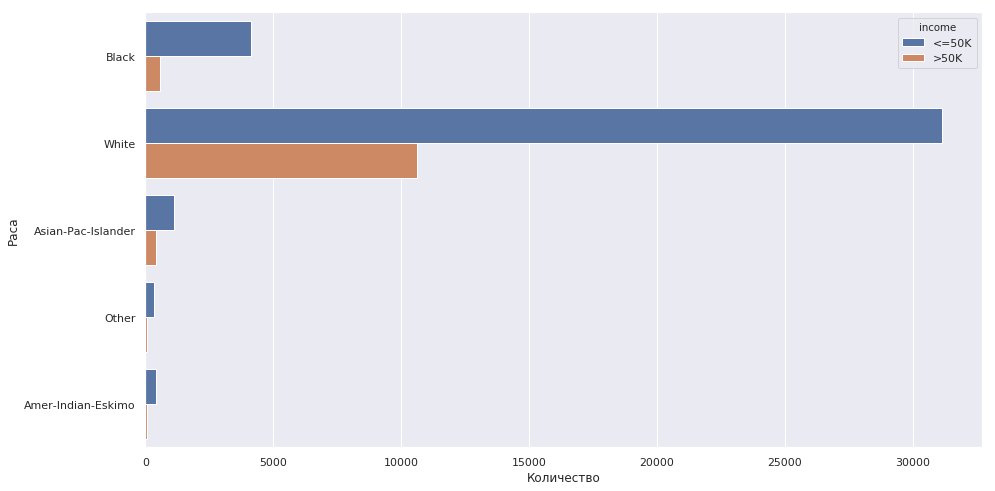

In [ ]:
plt.figure(figsize = (15, 8)) # задаем размер картинки
sns.countplot(y = 'race', hue = 'income', data = df) # визуализируем распределение дохода по расам
plt.xlabel('Количество') # подписываем ось Ox
plt.ylabel('Раса') # подписываем ось Oy

Больше всего в наших данных информации о белых людях. У белых людей и представителей монгольской расы (азиатов) соотношение примерно одинаковое. У черных людей процент людей, зарабатывающих более 50К, намного меньше в сравнении с белыми людьми и азиатами.

## gender <-> income отношение

Вычислим процентное соотношение мужчин и женщин, зарабатывающих более 50К и менее 50К.

In [ ]:
df9 = df[(df["gender"] == "Male")]["income"].value_counts(normalize = True) # значения относительно частоты встречаемых значений ">50K" и "<=50K" среди мужчин
df10 = df[(df["gender"] == "Female")]["income"].value_counts(normalize = True) # значения относительно частоты встречаемых значений ">50K" и "<=50K" среди женщин
print("Процент мужчин, зарабатывающих более 50К -", df9[">50K"]*100, "%;") # вывод частоты встречаемого значения ">50K" в процентах среди мужчин
print("Процент женщин, зарабатывающих более 50К -", df10[">50K"]*100, "%;") # вывод частоты встречаемого значения ">50K" в процентах среди женщин
print("Вывод:")
if(df9[">50K"] > df10[">50K"]) : # если частота встречаемого значения ">50K" выше у мужчин
    print("Мужчины в среднем зарабатывают больше.")
elif(df9[">50K"] == df10[">50K"]) : # если частота встречаемого значения ">50K" у мужчин и женщин одинаковая
    print("Женщины и мужчины в среднем зарабатывают одинаково.")
else: # в ином случае, т.е. если частота встречаемого значения ">50K" выше у женщин
    print("Женщины в среднем зарабатывают больше.")

Процент мужчин, зарабатывающих более 50К - 30.37672281776417 %;
Процент женщин, зарабатывающих более 50К - 10.925148221343873 %;
Вывод:
Мужчины в среднем зарабатывают больше.


Как видим, мужчины в среднем зарабатывают значительно больше женщин.
Визуализируем это распределение.

Text(0,0.5,'Пол')

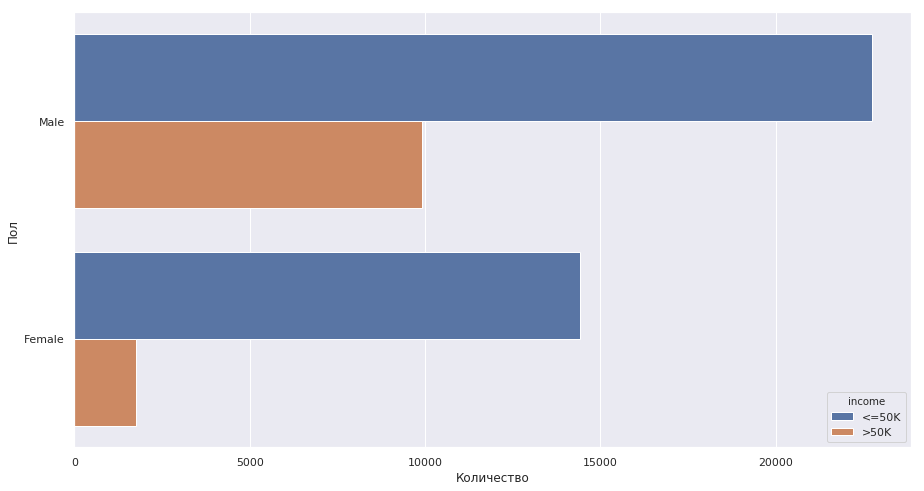

In [ ]:
plt.figure(figsize = (15, 8)) # задаем размер картинки
sns.countplot(y = 'gender', hue = 'income', data = df) # Визуализируем распределение доходов по гендеру
plt.xlabel('Количество') # подписываем ось Ox
plt.ylabel('Пол') # подписываем ось Oy

## "income" <-> "gender":"Female" отношение

Посмотрим, как доходы женщин зависят от их семейного положения.

In [ ]:
df11 = df[(df["income"] == ">50K")&(df["gender"] == "Female")]["relationship"].value_counts(normalize = True) # соотношение женщин, зарабатывающих более 50К, в разном семейном положении
df12 = df[(df["income"] == "<=50K")&(df["gender"] == "Female")]["relationship"].value_counts(normalize = True) # соотношение женщин, зарабатывающих менее 50К, в разном семейном положении
print("Процентное соотношение для женщин, зарабатывающих более 50К:")
print(df11*100) # вывод процентного соотношения женщин, зарабатывающих более 50К, в разном семейном положении
print("............................................................")
print("Процентное соотношение для женщин, зарабатывающих менее 50К:")
print(df12*100) # вывод процентного соотношения женщин, зарабатывающих менее 50К, в разном семейном положении

Процентное соотношение для женщин, зарабатывающих более 50К:
Wife              61.729791
Not-in-family     25.438101
Unmarried          9.157716
Own-child          2.317694
Other-relative     1.356699
Name: relationship, dtype: float64
............................................................
Процентное соотношение для женщин, зарабатывающих менее 50К:
Not-in-family     37.578867
Unmarried         26.111073
Own-child         23.122790
Wife               8.569646
Other-relative     4.610691
Husband            0.006933
Name: relationship, dtype: float64


Получили очень интересные результаты. Среди женщин, зарабатывающих более 50К, намного больше замужних, чем незамужних и очень маленький процент имеющих ребенка. Среди женщин, зарабатывающих менее 50К, намного больше незамужних и довольно большой процент имеющих ребенка. Также во втором соотношении всплыла ошибка в данных, был определен процент для семейного положения "Муж".

## "relationship" <-> "hours-per-week" отношение

Визуализируем зависимость количества рабочих часов от семейного положения.

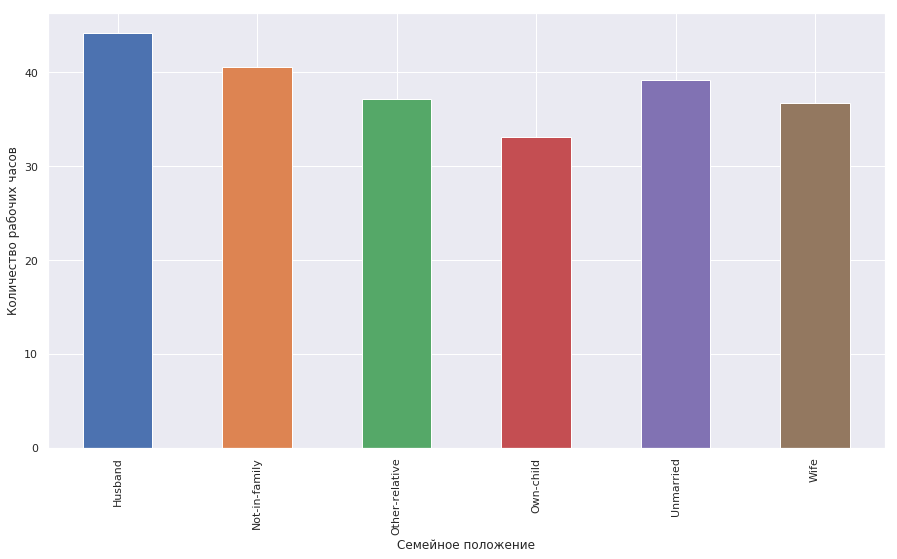

In [ ]:
plt.figure(figsize = (15, 8)) # задаем размер изображения
df.groupby("relationship")["hours-per-week"].mean().plot(kind = "bar") # группируем данные по семейному положению, вычисляем среднее кол-во рабочих часов в неделю в каждой группе
plt.xlabel('Семейное положение') # подписываем ось Ox
plt.ylabel('Количество рабочих часов') # подписываем ось Oy
plt.show() # строим

Как видим, мужчины, состоящие в браке, работают в среднем значительно больше остальных. Меньше всех работают те, у кого есть ребенок.